In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
import pymc3 as pm

In [3]:
i = 1982
avgMonth = []
regYrStart = [0,31,59,90,120,151,181,212,243,273,304,334]
regYrEnd = [31,59,90,120,151,181,212,243,273,304,334,365]
leapYrStart = [0,31,60,91,121,152,182,213,244,274,305,335]
leapYrEnd = [31,60,91,121,152,182,213,244,274,304,334,365]

In [4]:
x = pd.read_table("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/1981/Population.Heating.txt", delimiter="|", skiprows=[0,1,2])
x = x.set_index('Region')

In [5]:
for j, k in zip(regYrStart, regYrEnd):
            z = x.iloc[9,j:k]
            avgMonth.append(z.mean())

In [6]:
leapYears = [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
while(i < 2018):
    y = pd.read_table("ftp://ftp.cpc.ncep.noaa.gov/htdocs/degree_days/weighted/daily_data/%d/Population.Heating.txt" %(i), delimiter="|", skiprows=[0,1,2])
    y = y.set_index('Region')
    result = pd.concat([x,y], axis=1)
    x = result
    if(i in leapYears):
        for j, k in zip(leapYrStart, leapYrEnd):
            z = y.iloc[9,j:k]
            avgMonth.append(z.mean()) 
    else:
        for j, k in zip(regYrStart, regYrEnd):
            z = y.iloc[9,j:k]
            avgMonth.append(z.mean())
    i += 1

In [7]:
print(avgMonth)

[30.967741935483872, 24.035714285714285, 19.193548387096776, 8.2333333333333325, 5.032258064516129, 0.73333333333333328, 0.096774193548387094, 0.12903225806451613, 2.4666666666666668, 10.32258064516129, 16.399999999999999, 26.870967741935484, 33.70967741935484, 26.821428571428573, 19.451612903225808, 13.333333333333334, 3.2580645161290325, 1.6666666666666667, 0.16129032258064516, 0.4838709677419355, 2.6000000000000001, 8.5483870967741939, 17.166666666666668, 22.193548387096776, 27.774193548387096, 24.571428571428573, 18.35483870967742, 13.800000000000001, 5.741935483870968, 1.2333333333333334, 0.12903225806451613, 0.096774193548387094, 2.4333333333333331, 7.645161290322581, 16.800000000000001, 31.548387096774192, 31.580645161290324, 22.689655172413794, 21.741935483870968, 12.1, 5.258064516129032, 0.80000000000000004, 0.096774193548387094, 0.096774193548387094, 3.2999999999999998, 6.833333333333333, 18.517241379310345, 22.333333333333332, 33.645161290322584, 28.214285714285715, 17.25806

In [8]:
print(len(avgMonth))

444


In [9]:
result

,19810101,19810102,19810103,19810104,19810105,19810106,19810107,19810108,19810109,19810110,...,20171222,20171223,20171224,20171225,20171226,20171227,20171228,20171229,20171230,20171231
Region,,,,,,,,,,,,,,,,,,,,,
1,51,46,55,66,62,51,42,51,58,53,...,40,32,32,34,43,53,59,59,57,59
2,45,42,50,59,56,47,42,51,56,52,...,31,25,30,33,43,49,54,53,50,55
3,36,43,51,62,59,48,49,57,55,57,...,29,32,41,47,58,62,60,54,54,60
4,33,40,46,55,47,39,47,48,48,54,...,39,45,47,55,61,64,57,54,62,68
5,24,23,26,27,34,31,23,30,31,31,...,12,7,12,20,21,22,27,26,24,29
6,24,29,28,30,42,36,32,39,35,37,...,9,9,22,33,31,35,37,33,32,39
7,14,17,17,18,22,18,19,20,18,18,...,9,19,19,24,23,28,28,23,19,27
8,22,22,23,23,24,26,26,28,28,27,...,36,33,34,30,32,29,26,24,27,30
9,14,16,14,15,14,15,17,18,17,16,...,23,20,18,17,17,15,13,11,12,15


In [10]:
x_data = range(1,445)

In [11]:
print(x_data)

range(1, 445)


In [12]:
y_data = avgMonth

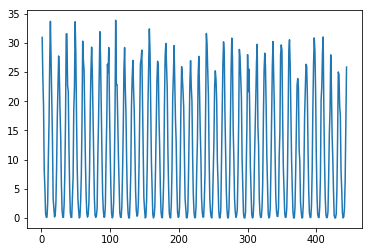

In [13]:
plt.plot(x_data, y_data)

<Container object of 444 artists>

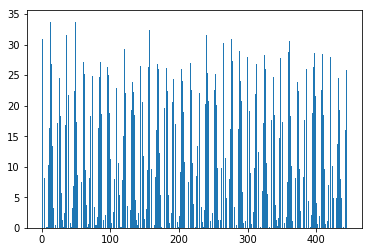

In [14]:
plt.bar(x_data, y_data)

In [15]:
i = 0
monthList = []
meanList = []
while(i < 12):
    monthRange = range(i, 444,12)
    for j in monthRange:
        monthList.append(avgMonth[j])
    monthArray = np.asarray(monthList)
    monthMean = monthArray.mean()
    meanList.append(monthMean)
    monthList = []
    i += 1

In [16]:
print(meanList)

[28.312118570183085, 25.371255491945149, 18.358326068003485, 10.62972972972973, 4.4176111595466434, 0.97027027027027024, 0.06625980819529205, 0.16129032258064516, 2.077477477477478, 8.1982563208369665, 17.039049394221809, 25.667916303400176]


In [17]:
months = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec']

<Container object of 12 artists>

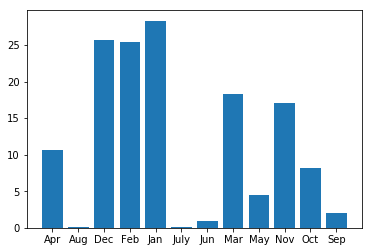

In [18]:
plt.bar(months, meanList)

# Let's look at the data from January 

In [19]:
JanList = []
JanRange = range(0,444,12)

In [20]:
for i in JanRange:
    JanList.append(avgMonth[i])
    JanArray = np.asarray(JanList)

In [21]:
print(JanArray)

[ 30.96774194  33.70967742  27.77419355  31.58064516  33.64516129
  27.06451613  29.29032258  31.93548387  24.93548387  22.87096774
  29.22580645  27.03225806  27.16129032  32.41935484  26.87096774
  29.93548387  29.5483871   24.09677419  26.96774194  27.70967742
  29.74193548  25.22580645  30.19354839  30.83870968  27.61290323
  21.64516129  26.74193548  28.25806452  30.25806452  29.67741935
  30.5483871   23.90322581  26.35483871  30.87096774  28.38709677
  27.96774194  24.58064516]


In [31]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=13, sd=20, testval=0)
    sd = pm.HalfNormal('sd', sd=1)
    n = pm.Normal('n', mu=mu, sd=sd, observed=JanArray)

    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|██████████| 5500/5500 [00:03<00:00, 1515.87it/s]


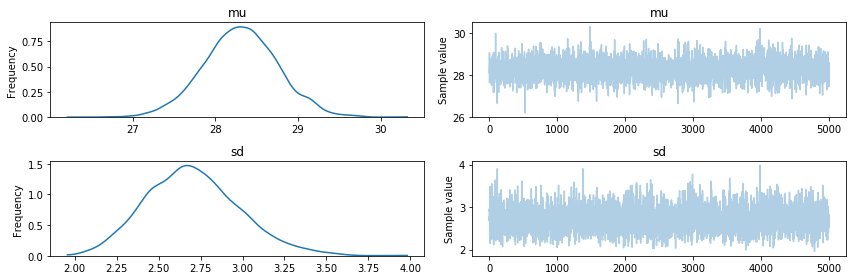

In [32]:

pm.traceplot(trace);



In [33]:
ppc = pm.sample_ppc(trace, samples=500, model=model, size=100)

100%|██████████| 500/500 [00:00<00:00, 2863.93it/s]


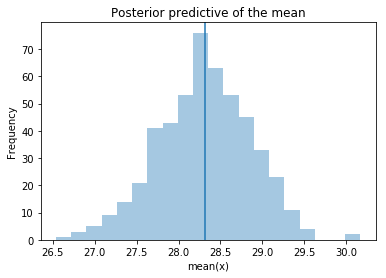

In [34]:
ax = plt.subplot()
sns.distplot([n.mean() for n in ppc['n']], kde=False, ax=ax)
ax.axvline(JanArray.mean())
ax.set(title='Posterior predictive of the mean', xlabel='mean(x)', ylabel='Frequency');